In [0]:
from pyspark.sql.functions import *

In [0]:
# Load the Delta table from the gold table
df_player_stats = spark.read.table("gold.player_stats").toPandas()
df_final = spark.read.format("delta").table("gold.player_stats_and_valuations")
df_team_performance_sorted = spark.read.format("delta").table("gold.team_performance_analysis").toPandas()
df_transfer_trends_sorted = spark.read.format("delta").table("gold.transfer_market_trends").toPandas()
df_market_value = spark.read.format("delta").table("gold.player_predictions").toPandas()

## Players Stats

**Top Ten Players by Total Goals**

In [0]:
import plotly.express as px

# Top 10 players by total goals
df_top_players = df_player_stats.sort_values(by="total_goals", ascending=False).head(10)

fig = px.bar(
    df_top_players,
    x="last_name",
    y="total_goals",
    color="club_name",
    title="Top Players by Total Goals",
    labels={"last_name": "Player Name", "total_goals": "Total Goals"},
    text="total_goals"
)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

**Top Players by Market Value**

In [0]:
import plotly.express as px

# Sort the DataFrame by market value in descending order and select the top 10 players
df_top_market_value = df_player_stats.sort_values(by="market_value_in_eur", ascending=False).head(10)

# Create an interactive bar chart
fig = px.bar(
    df_top_market_value,
    x="last_name",
    y="market_value_in_eur",
    color="club_name",
    title="Top Players by Market Value",
    labels={"last_name": "Player Name", "market_value_in_eur": "Market Value (EUR)"},
    text="market_value_in_eur"
)

# Format the text on the bars to show values in a readable format
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

# Ensure the bars are sorted in descending order
fig.update_layout(
    xaxis={'categoryorder': 'total descending'}  
)

# Show the plot
fig.show()

**Goals vs. Assists**

In [0]:
fig = px.scatter(
    df_player_stats,
    x="total_goals",
    y="total_assists",
    color="club_name",
    size="market_value_in_eur",
    hover_data=["first_name", "last_name"],
    title="Goals vs. Assists",
    labels={"total_goals": "Total Goals", "total_assists": "Total Assists"}
)
fig.show()

**Market Value vs. Average Minutes Played**

In [0]:
fig = px.scatter(
    df_player_stats,
    x="avg_minutes_played",
    y="market_value_in_eur",
    color="position",
    hover_data=["first_name", "last_name"],
    title="Market Value vs. Average Minutes Played",
    labels={"avg_minutes_played": "Average Minutes Played", "market_value_in_eur": "Market Value (EUR)"}
)
fig.show()

**Correlation Matrix for Selected Features**

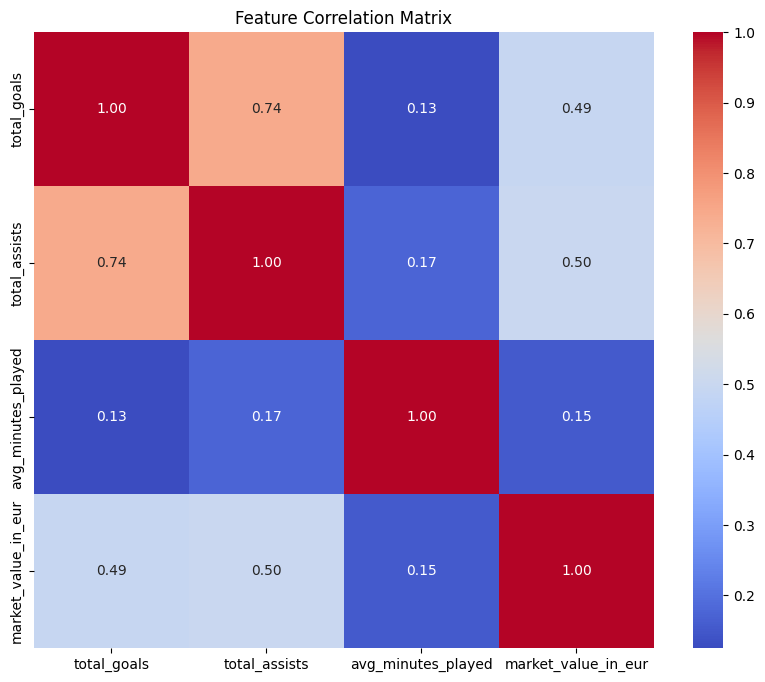

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_cols = ["total_goals", "total_assists", "avg_minutes_played", "market_value_in_eur"]
corr_matrix = df_player_stats[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

**Distribution of Players by Position**

In [0]:
position_counts = df_player_stats["position"].value_counts()

fig = px.pie(
    names=position_counts.index,
    values=position_counts.values,
    title="Distribution of Players by Position"
)
fig.show()

**Goals and Assists by Position**

In [0]:
position_stats = df_final.toPandas().groupby("position").agg({"total_goals": "sum", "total_assists": "sum"}).reset_index()

fig = px.bar(
    position_stats,
    x="position",
    y=["total_goals", "total_assists"],
    title="Goals and Assists by Position",
    labels={"position": "Position", "value": "Count"},
    barmode="stack"
)
fig.show()

**Market Value vs. Goals vs. Assists**

In [0]:
fig = px.scatter_3d(
    df_player_stats,
    x="total_goals",
    y="total_assists",
    z="market_value_in_eur",
    color="club_name",
    hover_data=["first_name", "last_name"],
    title="Market Value vs. Goals vs. Assists",
    labels={"total_goals": "Total Goals", "total_assists": "Total Assists", "market_value_in_eur": "Market Value (EUR)"}
)
fig.show()

**Average Market Value by Position**

In [0]:
# Group by position and calculate average market value
position_market_value = df_player_stats.groupby("position")["market_value_in_eur"].mean().reset_index()

# Sort by average market value (descending)
position_market_value = position_market_value.sort_values(by="market_value_in_eur", ascending=False)

# Create an interactive bar chart
fig = px.bar(
    position_market_value,
    x="position",
    y="market_value_in_eur",
    title="Average Market Value by Position",
    labels={"position": "Position", "market_value_in_eur": "Average Market Value (EUR)"},
    color="market_value_in_eur",
    color_continuous_scale="Viridis"
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

**Age of a Player Vs. Market**

In [0]:

# Convert Spark DataFrame to Pandas DataFrame
pdf = df_final.toPandas()

# Create an interactive scatter plot
fig = px.scatter(
    pdf,
    x="age",
    y="market_value_in_eur",
    title="Age vs. Market Value",
    labels={"age": "Age", "market_value_in_eur": "Market Value (EUR)"},
    hover_data=["first_name", "last_name", "position"],  
    color="position",  
    color_continuous_scale="Viridis"  
)

# Update layout for better readability
fig.update_layout(
    xaxis_title="Age",
    yaxis_title="Market Value (EUR)",
    hoverlabel=dict(bgcolor="white", font_size=12)  
)

# Show the plot
fig.show()

**Market Value Distribution by Position**

In [0]:

# Convert Spark DataFrame to Pandas DataFrame
pdf = df_final.toPandas()

# Create an interactive box plot
fig = px.box(
    pdf,
    x="position",
    y="market_value_in_eur",
    title="Market Value Distribution by Position",
    labels={"position": "Position", "market_value_in_eur": "Market Value (EUR)"},
    color="position"  # Optional: Color by position for better insights
)

# Update layout for better readability
fig.update_layout(
    xaxis_title="Position",
    yaxis_title="Market Value (EUR)"
)

# Show the plot
fig.show()

**Height Distribution by Position**

In [0]:
# Create an interactive box plot
fig = px.box(
    pdf,
    x="position",
    y="height_in_cm",
    title="Height Distribution by Position",
    labels={"position": "Position", "height_in_cm": "Height (cm)"},
    color="position"  # Optional: Color by position for better insights
)

# Update layout for better readability
fig.update_layout(
    xaxis_title="Position",
    yaxis_title="Height (cm)"
)

# Show the plot
fig.show()

## Team Perfomance Analysis

**Total Wins by Team**

In [0]:
pdf = df_team_performance_sorted.head(10)

# Create an interactive bar chart
fig = px.bar(
    pdf,
    x="name",
    y="total_wins",
    title="Top Teams by Total Wins",
    labels={"name": "Team Name", "total_wins": "Total Wins"},
    color="total_wins",  
    color_continuous_scale="Viridis"  
)

# Update layout for better readability
fig.update_layout(
    xaxis_title="Team Name",
    yaxis_title="Total Wins",
    xaxis_tickangle=-45  # Rotate x-axis labels for better readability
)

# Show the plot
fig.show()

**Total Points by Team**

In [0]:
import plotly.graph_objects as go

data = df_team_performance_sorted.head(10)  

# Create an interactive bar chart
fig = go.Figure(data=[
    go.Bar(
        x=data['name'],
        y=data['total_points'],
        marker_color='green'
    )
])

# Update layout for better readability
fig.update_layout(
    title="Top Teams by Total Points",
    xaxis_title="Team Name",
    yaxis_title="Total Points",
    xaxis_tickangle=-45  
)

# Show the plot
fig.show()

**Goals Scored vs. Goals Conceded**

In [0]:

# Create an interactive grouped bar chart
fig = go.Figure(data=[
    go.Bar(
        name="Goals Scored",
        x=data['name'],
        y=data['total_goals_scored'],
        marker_color='blue'
    ),
    go.Bar(
        name="Goals Conceded",
        x=data['name'],
        y=data['total_goals_conceded'],
        marker_color='red'
    )
])

# Update layout for better readability
fig.update_layout(
    title="Goals Scored vs. Goals Conceded",
    xaxis_title="Team Name",
    yaxis_title="Number of Goals",
    barmode='group',  # Grouped bar chart
    xaxis_tickangle=-45 
)

# Show the plot
fig.show()

**Average Goals Scored Per Game**

In [0]:
# Create an interactive line chart
fig = go.Figure(data=[
    go.Scatter(
        x=data['name'],
        y=data['avg_goals_scored_per_game'],
        mode='lines+markers',  # Line with markers
        marker=dict(color='blue', size=8),
        line=dict(color='blue'),
        name="Average Goals Scored Per Game"
    )
])

# Update layout for better readability
fig.update_layout(
    title="Average Goals Scored Per Game",
    xaxis_title="Team Name",
    yaxis_title="Average Goals Scored Per Game",
    xaxis_tickangle=-45  
)

# Show the plot
fig.show()

**Average Goals Conceded Per Game**

In [0]:
import plotly.graph_objects as go

data = df_team_performance_sorted.head(10)  

# Create an interactive line chart
fig = go.Figure(data=[
    go.Scatter(
        x=data['name'],
        y=data['avg_goals_conceded_per_game'],
        mode='lines+markers',  # Line with markers
        marker=dict(color='red', size=8),
        line=dict(color='red'),
        name="Average Goals Conceded Per Game"
    )
])

# Update layout for better readability
fig.update_layout(
    title="Average Goals Conceded Per Game",
    xaxis_title="Team Name",
    yaxis_title="Average Goals Conceded Per Game",
    xaxis_tickangle=-45  
)

# Show the plot
fig.show()

**Win-Loss-Draw Distribution for Manchester City Football Club**

In [0]:

team_data = df_team_performance_sorted[df_team_performance_sorted['name'] == "Manchester City Football Club"].iloc[0]

# Create an interactive pie chart
fig = go.Figure(data=[
    go.Pie(
        labels=['Wins', 'Losses', 'Draws'],
        values=[team_data['total_wins'], team_data['total_losses'], team_data['total_draws']],
        hole=0.3,  
        marker=dict(colors=['green', 'red', 'gray']),  # Colors for Wins, Losses, Draws
        textinfo='percent+label'  # Show percentages and labels
    )
])

# Update layout for better readability
fig.update_layout(
    title="Win-Loss-Draw Distribution for Manchester City Football Club"
)

# Show the plot
fig.show()

**'Goals Scored vs. Total Points**

In [0]:

data = df_team_performance_sorted

# Create an interactive scatter plot
fig = go.Figure(data=[
    go.Scatter(
        x=data['total_goals_scored'],
        y=data['total_points'],
        mode='markers',  # Scatter plot with markers
        marker=dict(
            color='blue',
            size=8,
            opacity=0.7
        ),
        text=data['name'], 
        hoverinfo='text+x+y'
    )
])

# Update layout for better readability
fig.update_layout(
    title="Goals Scored vs. Total Points",
    xaxis_title="Total Goals Scored",
    yaxis_title="Total Points"
)

# Show the plot
fig.show()

## Transfer Trends

**Trend in Average Market Value Over Time**

In [0]:

data = df_transfer_trends_sorted

# Create an interactive line chart
fig = go.Figure(data=[
    go.Scatter(
        x=data['transfer_season'],
        y=data['avg_market_value'],
        mode='lines+markers',  # Line with markers
        marker=dict(color='blue', size=8),
        line=dict(color='blue'),
        name="Average Market Value"
    )
])

# Update layout for better readability
fig.update_layout(
    title="Trend in Average Market Value Over Time",
    xaxis_title="Transfer Season",
    yaxis_title="Average Market Value",
    xaxis_tickangle=-45 
)

# Show the plot
fig.show()

**Trend in Total Transfers Over Time**

In [0]:

data = df_transfer_trends_sorted

# Create an interactive line chart
fig = go.Figure(data=[
    go.Scatter(
        x=data['transfer_season'],
        y=data['total_transfers'],
        mode='lines+markers',  # Line with markers
        marker=dict(color='orange', size=8),
        line=dict(color='orange'),
        name="Total Transfers"
    )
])

# Update layout for better readability
fig.update_layout(
    title="Trend in Total Transfers Over Time",
    xaxis_title="Transfer Season",
    yaxis_title="Total Transfers",
    xaxis_tickangle=-45)

# Show the plot
fig.show()

**Total Transfers by Season**

In [0]:

data = df_transfer_trends_sorted

# Create an interactive bar chart
fig = go.Figure(data=[
    go.Bar(
        x=data['transfer_season'],
        y=data['total_transfers'],
        marker_color='purple',  # Bar color
        name="Total Transfers"
    )
])

# Update layout for better readability
fig.update_layout(
    title="Total Transfers by Season",
    xaxis_title="Transfer Season",
    yaxis_title="Total Transfers",
    xaxis_tickangle=-45
)

# Show the plot
fig.show()

**Average Market Value by Season**

In [0]:
data = df_transfer_trends_sorted

# Create an interactive bar chart
fig = go.Figure(data=[
    go.Bar(
        x=data['transfer_season'],
        y=data['avg_market_value'],
        marker_color='green',  # Bar color
        name="Average Market Value"
    )
])

# Update layout for better readability
fig.update_layout(
    title="Average Market Value by Season",
    xaxis_title="Transfer Season",
    yaxis_title="Average Market Value",
    xaxis_tickangle=-45  
)

# Show the plot
fig.show()

**Market Value and Transfers Over Time**

In [0]:

data = df_transfer_trends_sorted

# Create an interactive dual-axis chart
fig = go.Figure()

# Add trace for Average Market Value (left y-axis)
fig.add_trace(
    go.Scatter(
        x=data['transfer_season'],
        y=data['avg_market_value'],
        mode='lines+markers',
        name="Average Market Value",
        marker=dict(color='red'),
        line=dict(color='red'),
        yaxis='y1'  # Left y-axis
    )
)

# Add trace for Total Transfers (right y-axis)
fig.add_trace(
    go.Scatter(
        x=data['transfer_season'],
        y=data['total_transfers'],
        mode='lines+markers',
        name="Total Transfers",
        marker=dict(color='blue'),
        line=dict(color='blue'),
        yaxis='y2'  # Right y-axis
    )
)

# Update layout for dual y-axes
fig.update_layout(
    title="Market Value and Transfers Over Time",
    xaxis_title="Transfer Season",
    yaxis=dict(
        title="Average Market Value",
        titlefont=dict(color="red"),
        tickfont=dict(color="red"),
        side="left"  # Left y-axis
    ),
    yaxis2=dict(
        title="Total Transfers",
        titlefont=dict(color="blue"),
        tickfont=dict(color="blue"),
        overlaying="y",
        side="right"  # Right y-axis
    ),
    xaxis_tickangle=-45 
)

# Show the plot
fig.show()